Create a dataset for model training

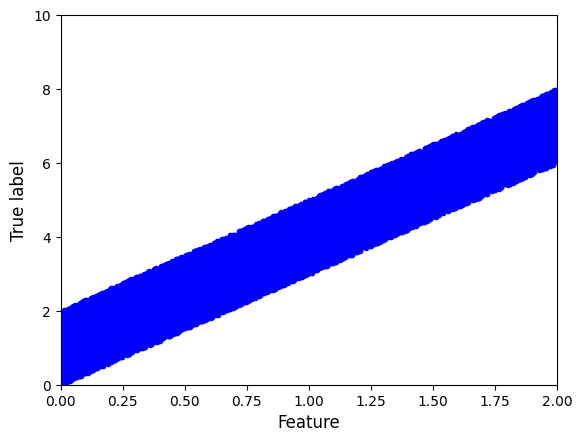

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(10000, 2) #X are 10000 inputs with 2-dimensional feature randomly distributed in [0, 2)
y = 3 * X + np.random.uniform(0, 2, (10000, 2)) #y are true label values

plt.plot(X, y, "b.")
plt.xlabel("Feature", fontsize=12)
plt.ylabel("True label", fontsize=12)
plt.axis([0,2,0,10])
plt.show()

Convert dataset to tensor as pytorch only support tensor


In [ ]:
from torch.utils.data import Dataset, DataLoader
import torch
from torchvision import transforms

class ConvertDataset(Dataset):
    def __init__(self, X, y, transform=None):
        self.X = X
        self.y = y
        self.transform = transform

    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, index):
        feature = self.X[index]
        label = self.y[index]
        sample = {'feature': feature, 'label': label}

        if self.transform:
            sample = self.transform(sample)

        return sample
    
class ToTensor(object):
    def __call__(self, sample):
        feature, label = sample['feature'], sample['label']
        label = np.array(label)
        return {
            'feature': torch.from_numpy(feature).float(),
            'label': torch.from_numpy(label).float()
        }

#Convert training data into tensor
train_dataset = ConvertDataset(X, y, transform=transforms.Compose([ToTensor()]))

#Load the converted training data into DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=true, num_workers=0)
